In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x = df.drop('Outcome', axis = 1)
y = df[['Outcome']]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [6]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
y_pred = decision_tree.predict(x_test)
y_pred_train = decision_tree.predict(x_train)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred) #testing accuracy

0.7077922077922078

In [9]:
accuracy_score(y_train, y_pred_train)  #training accuracy

1.0

In [10]:
confusion_matrix(y_test, y_pred)  #testing matrix

array([[78, 21],
       [24, 31]], dtype=int64)

In [11]:
confusion_matrix(y_train, y_pred_train)  #training matrix

array([[401,   0],
       [  0, 213]], dtype=int64)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 

[Text(140.55283018867925, 210.192, 'X[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]\nclass = Pregnancies'),
 Text(56.62722371967655, 195.696, 'X[7] <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]\nclass = Pregnancies'),
 Text(29.780053908355796, 181.2, 'X[5] <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]\nclass = Pregnancies'),
 Text(19.8533692722372, 166.704, 'X[5] <= 30.95\ngini = 0.147\nsamples = 213\nvalue = [196, 17]\nclass = Pregnancies'),
 Text(10.82911051212938, 152.208, 'X[0] <= 7.5\ngini = 0.031\nsamples = 126\nvalue = [124, 2]\nclass = Pregnancies'),
 Text(7.219407008086254, 137.712, 'X[6] <= 0.668\ngini = 0.016\nsamples = 125\nvalue = [124, 1]\nclass = Pregnancies'),
 Text(3.609703504043127, 123.216, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]\nclass = Pregnancies'),
 Text(10.82911051212938, 123.216, 'X[5] <= 23.55\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Pregnancies'),
 Text(7.219407008086254, 108.72, 'gini = 0.0\nsamples = 1\n

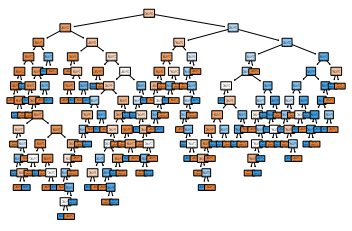

In [13]:
# from sklearn.tree import plot_tree
# plot_tree(decision_tree = decision_tree, class_names = df.columns, filled = True, rounded = True)

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
hyperparameter = {'criterion':['gini', 'entropy'], 'max_depth' : list(range(2,10,2))}
hyperparameter


gsv = GridSearchCV(decision_tree, hyperparameter, cv = 5)
rsv = RandomizedSearchCV(decision_tree, hyperparameter, cv = 5)

best_model_gsv = gsv.fit(x_train, y_train)
best_model_rsv = rsv.fit(x_train, y_train)

c:\users\vijay\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [15]:
best_model_gsv.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [16]:
best_model_rsv.best_params_

{'max_depth': 2, 'criterion': 'gini'}

In [17]:
best_model_gsv.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [18]:
best_model_rsv.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [19]:
y_pred_gs = best_model_gsv.predict(x_test)
accuracy_score(y_test, y_pred_gs)

0.7987012987012987

In [20]:
y_pred_rs = best_model_rsv.predict(x_test)
accuracy_score(y_test, y_pred_rs)

0.7987012987012987

In [21]:
y_pred = decision_tree.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [22]:
y_pred_prob = decision_tree.predict_proba(x_test)
y_pred_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob[:,1])

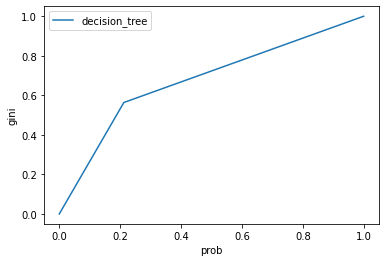

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.plot(fpr, tpr, label = 'decision_tree')
plt.xlabel('prob')
plt.ylabel('gini')
plt.legend(loc = 'best')

In [25]:
import pickle
pickle.dump(decision_tree,open('decision_model.pickle','wb'))

In [26]:
import pickle
col1 = x_test.head(5)
pickle.dump(col1,open('test.pickle','wb'))

In [27]:
x_test.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


In [28]:
y_pred = decision_tree.predict(x_test.head(5))
y_pred

array([0, 0, 0, 1, 0], dtype=int64)